<a href="https://colab.research.google.com/github/JMateusNSilva/python_uerj_2020_2/blob/master/projeto01/Projeto01_Bethe_Block_equation_vers%C3%A3o_de_entrega.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [40]:
# CONSTANTES UTILIZADAS NO PROGRAMA
mc2 = 0.5110                         # massa do elétron - unidade MeV 
I = 29*10**(-5)                      # I/Z aprox 10^{-5} onde Z é o número atômico para o cobre (Z=29)
K = 0.307                            # Constante K em Mev
z = -1                               # Carga da partícula insidente - este caso para o múon.
rho = 8.960                          # g/cm^3 densidade do meio
A = 63.546                           # número de massa do meio - unidade: g/mol 
Z = 29                               # Número atômico do cobre

In [41]:
# CRIANDO AS FUNÇÕES QUE SERÃO UTILIZADAS

#----FUNÇÃO GAMMA----
def gamma(beta):
    """Calcula um valor de gamma quando inserido um valor para beta.
    """
    gamma = (1-beta**2)**(-1/2)        # beta^2 = u^2/c^2 u-veloc. particula, c - veloc. luz.
    return gamma

#----FUNÇÃO ARGUMENTO DO LN ----
def ln_argument(valor):
    ''' Calcula o argumento do ln da função de Bethe-Block retornando o argumento
    '''
    x = (2*mc2 * valor**2) / I
    return x

In [42]:
# Testando função para o valor de 0.6.

print('gamma =', gamma(0.6))

gamma = 1.25


In [43]:
# TRANSFORMANDO A FUNÇÃO GAMMA EM MÓDULO
%%writefile função_gamma.py
def gamma(beta):
    """Calcula um valor de gamma quando inserido um valor para beta.
    """
    gamma = (1-beta**2)**(-1/2)        # beta^2 = u^2/c^2 u-veloc. particula, c - veloc. luz.
    return gamma

Overwriting função_gamma.py


In [44]:
%cat função_gamma.py

def gamma(beta):
    """Calcula um valor de gamma quando inserido um valor para beta.
    """
    gamma = (1-beta**2)**(-1/2)        # beta^2 = u^2/c^2 u-veloc. particula, c - veloc. luz.
    return gamma

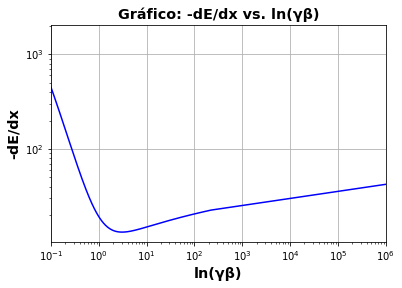

In [45]:
#CHAMANDO OS MODULOS UTILIZADOS
import numpy as np
import matplotlib.pyplot as plt
from função_gamma import gamma


# ESCREVENDO UM VETOR COM OS VALORES DE BETA
beta1 = np.arange(0.00001,0.01,0.00001)              # Explorando o limite  0.00001 <= beta < 0.01
beta2 = np.arange(0.01,0.996,0.001)                  # Explorando o limite  0.01    <= beta < 0.996
beta3 = np.arange(0.9960, 1.0, 0.00001)              # Explorando o limite  0.996   <= beta < 1.0


# ONDE beta É A CONCATENAÇÃO DE 
beta = np.concatenate((beta1,beta2,beta3))           # beta é um vetor limitado no intervalo de  0.00001 <= beta < 1.0

# CALCULANDO OS VALORES DE gamma UTILIZANDO O VETOR beta NA FUNÇÃO GAMMA
gamma = gamma(beta)

# CALCULANDO O PRODUTOD DE gamma VEZES beta
gamma_beta = gamma * beta

# CALCULANDO O ARGUMENTO DO LN DA EQUAÇÃO DE BETHE-BLOCK
x = ln_argument(gamma_beta)

# CALCULANDO O COLCHETES DA EQUAÇÃO DE BETHE-BLOCK
ln_x = np.log(x)
colchetes = ln_x - beta**2

const = K * z**2 * rho * (Z/A)                       # Reunindo as constantes da equação.

# CALCULANDO: -dE/dx
dE_over_dx = const * (1/beta**2) * colchetes

# GERANDO O GRÁFICO DA FIGURA
fig, ax1 = plt.subplots()
ax1.set_title('Gráfico: -dE/dx vs. ln(γβ)',fontsize='x-large', fontweight='bold')
ax1.set_xlabel('ln(γβ)',fontsize='x-large', fontweight='bold')
ax1.set_ylabel('-dE/dx', fontsize='x-large', fontweight='bold')
ax1.set_xscale('log')
ax1.set_xlim(0.1,10**6)                     # Limita o eixo x entre os valores de 0.1 até 100
ax1.set_yscale('log')
ax1=plt.grid()
ax1=plt.plot( gamma_beta, dE_over_dx, 'blue')



